Notebook to demonstrate I can make a json file and plot an edgelist file


In [2]:
import pandas as pd
import graspy
import networkx as nx
import numpy as np
import json
%matplotlib inline

In [2]:
df = pd.read_csv("exampleEdgelist.csv")

In [3]:
df

,Node Source,Node Target,weight
0,11,22,22
1,22,33,3
2,33,44,0
3,44,66,1
4,55,11,11
5,66,55,10


In [4]:
new = np.full((6,6), 0).astype(int)
# for row in range(6):
#     for col in range(6):
#         new[row, col] = 
        
# newmap = enumerate(df.values[:,0]); print(list(newmap))
id_to_index_map = {df.values[i,0] : i for i in range(len(df.values))}; print(id_to_index_map)

for index, match, val in df.values:
    print(f"index: {index}, match: {match}, val: {val}")
    new[id_to_index_map[index], id_to_index_map[match]] = val

print('    ',*id_to_index_map.keys())
for i, row in enumerate(new):
    print(df.values[i, 0], row)

print(new)

{11: 0, 22: 1, 33: 2, 44: 3, 55: 4, 66: 5}
index: 11, match: 22, val: 22
index: 22, match: 33, val: 3
index: 33, match: 44, val: 0
index: 44, match: 66, val: 1
index: 55, match: 11, val: 11
index: 66, match: 55, val: 10
     11 22 33 44 55 66
11 [ 0 22  0  0  0  0]
22 [0 0 3 0 0 0]
33 [0 0 0 0 0 0]
44 [0 0 0 0 0 1]
55 [11  0  0  0  0  0]
66 [ 0  0  0  0 10  0]
[[ 0 22  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  1]
 [11  0  0  0  0  0]
 [ 0  0  0  0 10  0]]


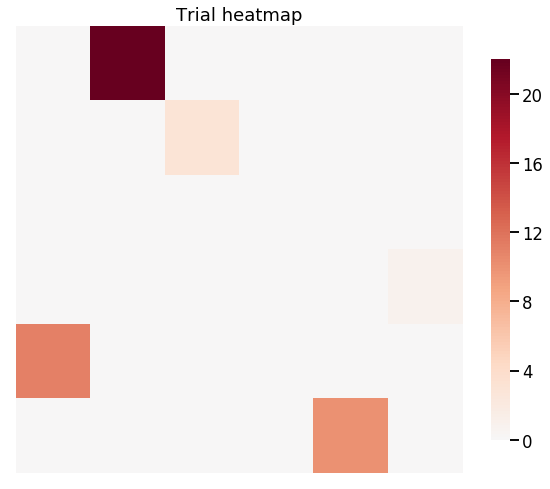

In [5]:
from graspy.plot import heatmap

title = 'Trial heatmap'

fig= heatmap(new, title=title)

### Read in the nodes attributes csv and make a json from it

In [6]:
df2 = pd.read_csv("exampleNode.csv", index_col = 0)

In [7]:
df2

,Name,Location,Gender
Node,,,
11,xx,123,male
22,yy,234,male
33,zz,456,male
44,aa,765,female
55,bb,45,female
66,cc,34,female


In [8]:
## convert to a json
dictOfdf = df2.to_dict('index')

In [9]:
dictOfdf

{11: {'Name': 'xx', 'Location': 123, 'Gender': 'male'},
 22: {'Name': 'yy', 'Location': 234, 'Gender': 'male'},
 33: {'Name': 'zz', 'Location': 456, 'Gender': 'male'},
 44: {'Name': 'aa', 'Location': 765, 'Gender': 'female'},
 55: {'Name': 'bb', 'Location': 45, 'Gender': 'female'},
 66: {'Name': 'cc', 'Location': 34, 'Gender': 'female'}}

In [10]:
with open('dataNode.json', 'w') as outfile:  
    json.dump(dictOfdf, outfile)

In [11]:
#### READING THE JSON IN 
with open('dataNode.json') as json_file:  
    attributes = json.load(json_file)

In [12]:
print(type(attributes))
attributes

<class 'dict'>


{'11': {'Name': 'xx', 'Location': 123, 'Gender': 'male'},
 '22': {'Name': 'yy', 'Location': 234, 'Gender': 'male'},
 '33': {'Name': 'zz', 'Location': 456, 'Gender': 'male'},
 '44': {'Name': 'aa', 'Location': 765, 'Gender': 'female'},
 '55': {'Name': 'bb', 'Location': 45, 'Gender': 'female'},
 '66': {'Name': 'cc', 'Location': 34, 'Gender': 'female'}}

In [13]:
type(attributes['11'])
attributes['11']

{'Name': 'xx', 'Location': 123, 'Gender': 'male'}

#### Plot the heatmap with node attributes

In [40]:
##First get the labels from the json file
labels = []

for k, v in attributes.items():
    for key, val in v.items():
        if key == "Gender":
            labels.append(val)
labels

['male', 'male', 'male', 'female', 'female', 'female']

6


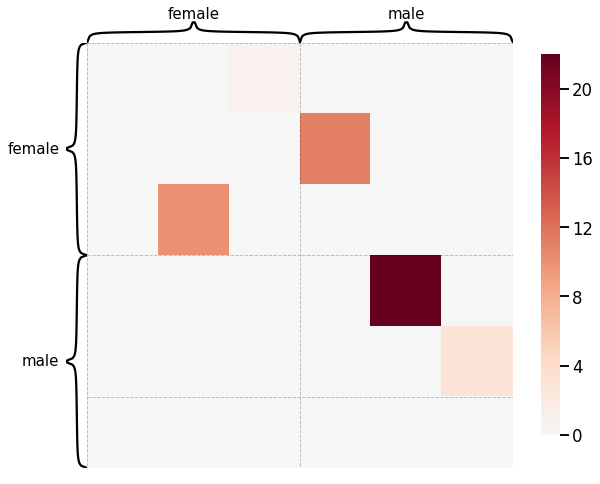

In [41]:
from graspy.plot import heatmap

title = 'Trial heatmap'

#labels= ['male', 'male', 'male','female', 'female', 'female']
labels = np.array(labels)


print(new.shape[0])


fig= heatmap(new, title=title, inner_hier_labels = labels)

### Trial with my code and Ben's graph example

In [1]:
### I'll create a json and a plot for his herm chem full graph

In [11]:
### first to read the graph csv in

bdata = pd.read_csv("../eleGraSPy/nice_data/herm_chem_A_full.csv", header = None)

In [12]:
bdata.shape

(453, 453)

In [13]:
metadata = pd.read_csv("../eleGraSPy/nice_data/master_cells.csv")

In [18]:
## turn this into a json
BenDict = metadata.to_dict('index')
with open('BenJson.json', 'w') as outfile:  
    json.dump(BenDict, outfile)

In [19]:
BenDict

{0: {'name': 'ASJL',
  'type1': 'sensory',
  'type2': 'SN6',
  'type3': 'na',
  'whitetype': 'na',
  'sex': 'both',
  'pharynx': 'nonpharynx',
  'homolog': 'ASJR',
  'sidepaired': 'left'},
 1: {'name': 'ASJR',
  'type1': 'sensory',
  'type2': 'SN6',
  'type3': 'na',
  'whitetype': 'na',
  'sex': 'both',
  'pharynx': 'nonpharynx',
  'homolog': 'ASJL',
  'sidepaired': 'right'},
 2: {'name': 'ASKL',
  'type1': 'sensory',
  'type2': 'SN6',
  'type3': 'na',
  'whitetype': 'na',
  'sex': 'both',
  'pharynx': 'nonpharynx',
  'homolog': 'ASKR',
  'sidepaired': 'left'},
 3: {'name': 'ASKR',
  'type1': 'sensory',
  'type2': 'SN6',
  'type3': 'na',
  'whitetype': 'na',
  'sex': 'both',
  'pharynx': 'nonpharynx',
  'homolog': 'ASKL',
  'sidepaired': 'right'},
 4: {'name': 'ASGL',
  'type1': 'sensory',
  'type2': 'SN6',
  'type3': 'na',
  'whitetype': 'na',
  'sex': 'both',
  'pharynx': 'nonpharynx',
  'homolog': 'ASGR',
  'sidepaired': 'left'},
 5: {'name': 'ASGR',
  'type1': 'sensory',
  'type2':

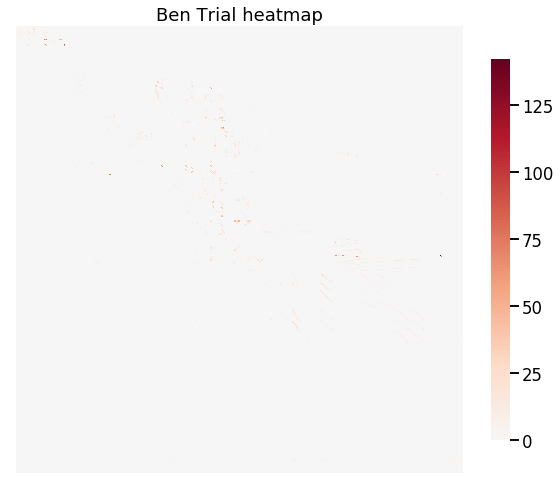

In [22]:
from graspy.plot import heatmap

title = 'Ben Trial heatmap'







fig= heatmap(np.array(bdata), title=title)